## Mirage: refraction of light rays in a media in which the refraction index changes with the height (PHYS 325)
Some computations are done here using the Python scikit-fmm module (https://pythonhosted.org/scikit-fmm/#)

In [52]:
# pip2 install scikit-fmm

import numpy as np
import pylab as plt
import skfmm

fsize=16
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'

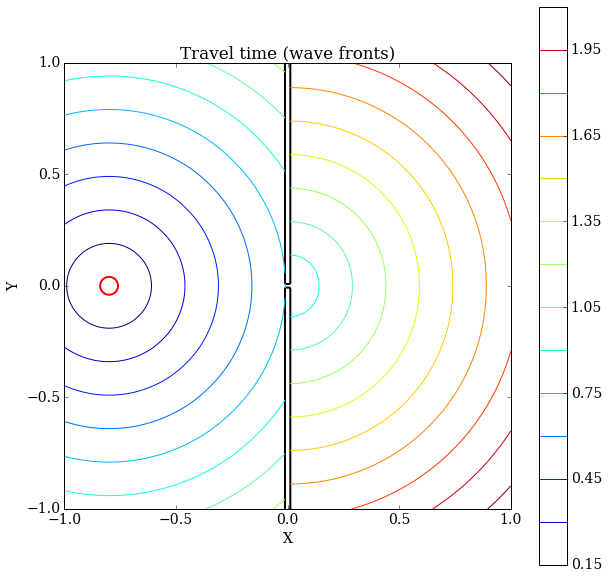

In [53]:
# a test of scikit-fmm - propagation of a spherical wave front through a slit in a wall

N=501

a=1.
dx=2*a/(N-1)

X, Y = np.meshgrid(np.linspace(-a,a,N), np.linspace(-a,a,N))

phi = (X+0.8)**2+(Y)**2 - 0.0016

mask = np.logical_and(abs(X)<0.01, abs(Y)>0.01)
phi  = np.ma.MaskedArray(phi, mask)

speed = 1.*np.ones_like(X) # the speed of light in vacuum is assumed to be c=1.

# plot the spherical wave fronts

fig=plt.figure()
fig.set_size_inches(10,10)

plt.title("Travel time (wave fronts)")
plt.contour(X, Y, phi, [0], colors='red', linewidths=(2))
plt.contour(X, Y, phi.mask, [0], linewidths=(2), colors='black')
plt.contour(X, Y, skfmm.travel_time(phi, speed, dx, periodic=(1,0)), 15)
plt.gca().set_aspect(1)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.show()

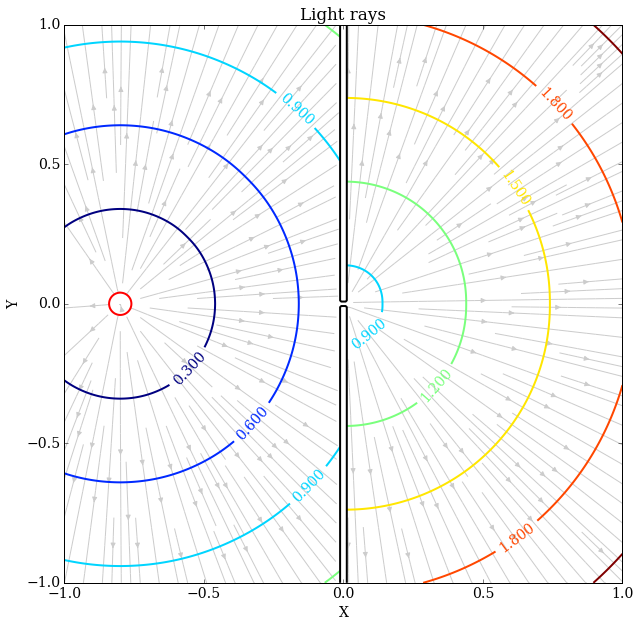

In [54]:
# Plot flowlines (light rays) perpendicular to the wave front - the surfaces of a constant propagation time

tt = skfmm.travel_time(phi, speed, dx, periodic=(1,0))
dv, du = np.gradient(tt)

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

ax.streamplot(X, Y, du, dv, color='0.8', density=2)

# Contour gridded head observations

contours = ax.contour(X, Y, tt, linewidths=2)
ax.clabel(contours)
plt.contour(X, Y, phi, [0], colors='red', linewidths=(2))
plt.contour(X, Y, phi.mask, [0], linewidths=(2), colors='black')

plt.title("Light rays")
plt.gca().set_aspect(1)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

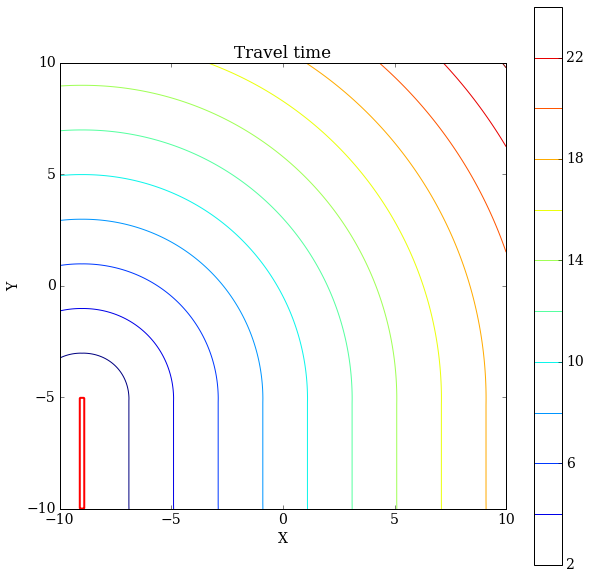

In [55]:
# a test - wave fronts from a post ("a palm tree")

N=501

a=10.
dx=2*a/(N-1)

X, Y = np.meshgrid(np.linspace(-a,a,N), np.linspace(-a,a,N))

phi = -1*np.ones_like(X)
phi[np.logical_and(np.abs(Y+7.5)<2.5, np.abs(X+9.)<0.1)] = 1

speed = 1.*np.ones_like(X) 

fig=plt.figure()
fig.set_size_inches(10,10)

plt.title("Travel time")
plt.contour(X, Y, phi, [0], colors='red', linewidths=(2))
plt.contour(X, Y, skfmm.travel_time(phi, speed, dx), 15)
plt.gca().set_aspect(1)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.show()

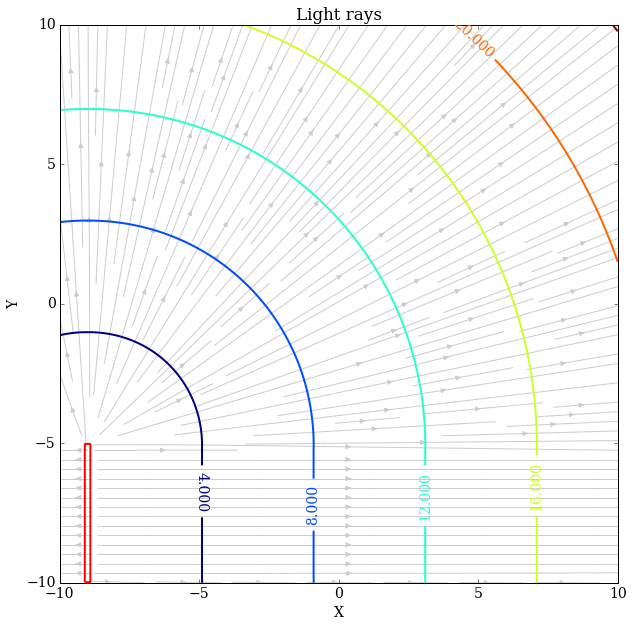

In [56]:
# Plot flowlines (light rays) from the post

tt = skfmm.travel_time(phi, speed, dx)
dv, du = np.gradient(tt) # Flow goes down gradient (thus -zi)

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

ax.streamplot(X, Y, du, dv, color='0.8', density=2)

# Contour gridded head observations
contours = ax.contour(X, Y, tt, linewidths=2)
ax.clabel(contours)
plt.contour(X, Y, phi, [0], colors='red', linewidths=(2))

plt.title("Light rays")
plt.gca().set_aspect(1)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### In their paper "Ray Tracing in Non-Constant Media", Jos Stam and Eric Languenou 
suggest the following prescription for a change of the refraction index with the height y above the surface of a hot asphalt road:  

$$
n(y) = 1 + \frac{T_0(n_0-1)}{T_0+(T_\mathrm{S}-T_0)\exp (-y/d_0)},
$$

where $n_0 = 1.00023$ is the index of refraction of air at $T_0 = 273$ K at sea level air pressure,
$T_\mathrm{S} = 305$ K is the teperature of the hot asphalt road, and $d = 0.01$ m is the dropoff length.
In order to see the effect of the refraction clearer, we will take a higher value of $n_0 = 1.01$.

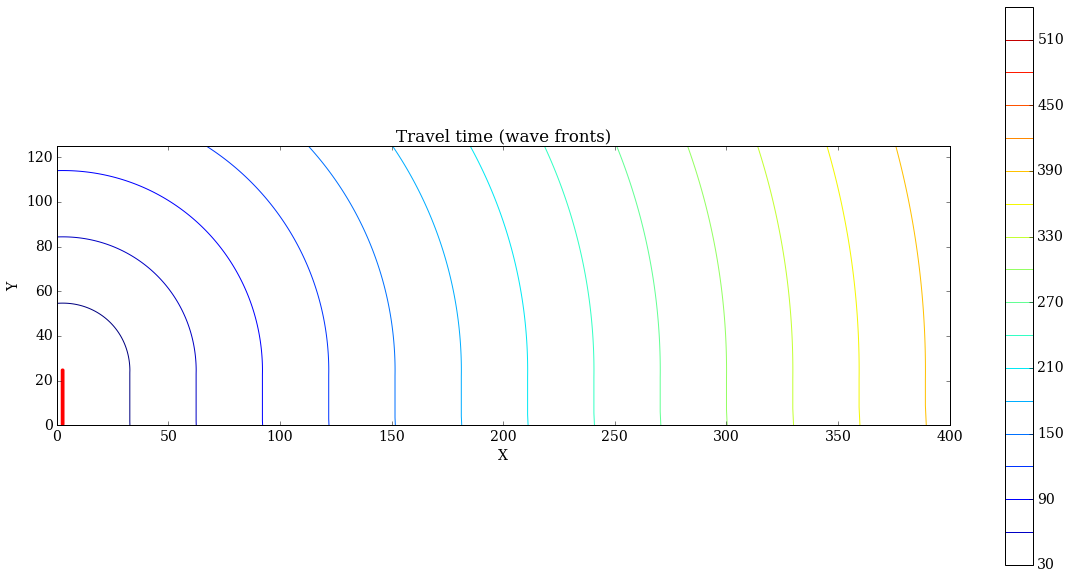

In [57]:
# a mirage is produced by refraction of light rays near a hot surface 
# where the refraction index quickly changes (decreases) with height

N=1001 # resolution

h=25. # height of the post in meters
d=5. # x-coordinate of the post
w=1. # width of the post
a=400. # length of the area
dx=a/(N-1)

X, Y = np.meshgrid(np.linspace(0,a,N), np.linspace(0,a,N))

# it is assumed that the refraction index is exponentially decreasing with height from the surface
# from a value n=n0 > 1 at the hot surface to a value n=1 in the cold air far from the surface

n0=1.01 # 1.00023 # index at the surface
T0=273. # temperature at a large distance from the surface
TS=305. # temperature at the surface
d0=0.01 # the exponential decay scale for n

phi = -1*np.ones_like(X)
phi[np.logical_and(np.abs(Y-0.5*h)<0.5*h, np.abs(X-0.5*d)<0.5*w)] = 1

speed = (1./(1.+T0*(n0-1.)/(T0+(TS-T0)*np.exp(-(Y)/d0))))*np.ones_like(X) 

fig=plt.figure()
fig.set_size_inches(20,10)

plt.title("Travel time (wave fronts)")
plt.contour(X, Y, phi, [0], colors='red', linewidths=(2))
plt.contour(X, Y, skfmm.travel_time(phi, speed, dx), 20)
plt.gca().set_aspect(1)
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0,5*h)
plt.colorbar()

plt.show()

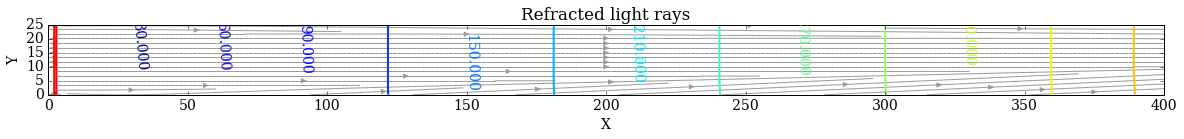

In [58]:
# Plot flowlines (light rays) 

tt = skfmm.travel_time(phi, speed, dx)
dv, du = np.gradient(tt) # Flow goes down gradient (thus -zi)

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

ax.streamplot(X, Y, du, dv, color='0.6', density=8)

# Contour gridded head observations
contours = ax.contour(X, Y, tt, 20, linewidths=2)
ax.clabel(contours)
plt.contour(X, Y, phi, [0], colors='red', linewidths=(2))

plt.title("Refracted light rays")
plt.gca().set_aspect(1)
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0,1.*h)
plt.show()

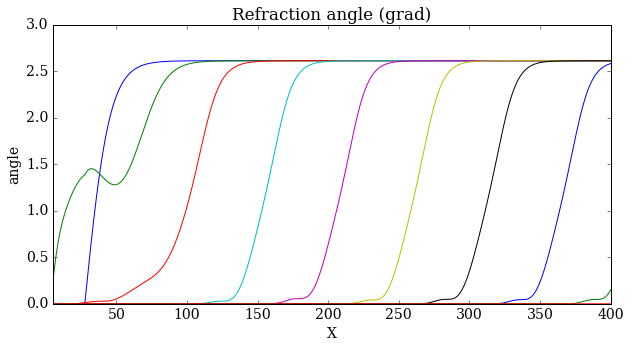

In [59]:
fig=plt.figure()
fig.set_size_inches(10,5)

nn=60
for k in range(0,nn,3):
    xx=X[k,:]
    yy=Y[k,:]
    grx=du[k,:]
    gry=dv[k,:]
    theta=np.ones_like(grx)
    zz=gry[100]/grx[100]
    for i in range(len(xx)):
        theta[i]=0.
        if grx[i] > 0.:
            theta[i]=gry[i]/grx[i]
        if theta[i] < 1e-10:
            theta[i]=0.
        theta[i]=(180./np.pi)*theta[i]
    plt.plot(xx,theta)

plt.title("Refraction angle (grad)")
plt.xlabel('X')
plt.ylabel('angle')
plt.xlim(d,a)

plt.show()

### A test of the numerical solution with a simple analytical model

If the change of the index of refraction above a hot surface is approximated as
$ n(y) = n_\mathrm{s}(1+ky)$, where $n_\mathrm{s}=n(0)$ is its value at the surface, then the eikonal equation
can be solved analytically under the assumptions that $ky\ll 1$ and $\dot{x}^2\ll 1$ (the latter is true for nearly horizontal light rays), and the solution for the light ray trajectory is

$$
\mathbf{r}(x,y) = (\frac{k}{2}x^2+\tan\theta_0 x + y_0)\,\mathbf{e}_y + x\,\mathbf{e}_x,
$$

assuming that the light ray is launched from a height $y_0$ at an angle $\theta_0$ with respect to the horizontal surface of the earth (see Darryl D Holm's lectures on "Fermat’s Principle and the Geometric Mechanics of Ray Optics").

Show that the first of the above two prescriptions for the refraction index can be reduced to the second, provided that

$$
k = \frac{\frac{T_0}{T_\mathrm{S}}(n_0-1)(1-\frac{T_0}{T_\mathrm{S}})\frac{1}{d_0}}{1+\frac{T_0}{T_\mathrm{S}}(n_0-1)}.
$$

In [60]:
k = ((T0/TS)*(n0-1.)*(1.-T0/TS)/d0)/(1.+(T0/TS)*(n0-1.))
print "k =",k

k = 0.0930771226426


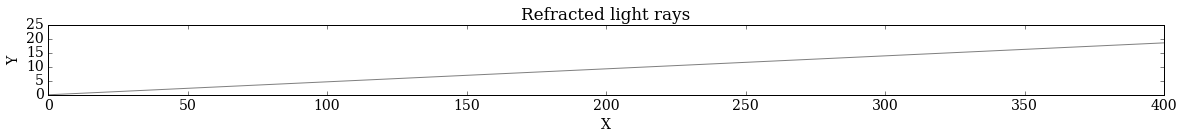

In [61]:
xx = np.linspace(0,a,N)
theta0 = (np.pi/180.)*(0.) # the initial angle of the light ray
y0 = 0. # the initial height
yy = (0.5*k*xx+np.tan(theta0)*xx+y0)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plt.plot(xx,yy,'grey')
plt.title("Refracted light rays")
plt.gca().set_aspect(1)
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0,1.*h)
plt.show()